<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__3)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20-3.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,52.376395,63.324515,0.077945,170.402694,170.535906,-0.133212
1,0.0,1.0,47.067808,56.941057,26.003796,-0.059190,139.953470,140.016891,-0.063421
2,0.0,2.0,99.291665,22.849533,30.957183,0.049787,163.148167,162.248013,0.900154
3,0.0,3.0,36.059748,76.212289,75.919027,0.638486,198.829550,198.738986,0.090563
4,0.0,4.0,22.561835,46.548889,54.756818,0.003634,133.871176,134.268238,-0.397062
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.736118,32.283169,93.439304,0.494578,157.953168,157.294254,0.658914
19996,999.0,16.0,51.055155,21.319518,58.940299,-0.413433,140.901539,140.935564,-0.034025
19997,999.0,17.0,76.385757,25.850937,43.014069,-1.014742,154.236022,154.802752,-0.566731
19998,999.0,18.0,73.277075,79.036874,96.798445,-0.074684,259.037711,259.114378,-0.076667


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  52.376395  63.324515  ...  170.402694  170.535906 -0.133212
      1.0    47.067808  56.941057  26.003796  ...  139.953470  140.016891 -0.063421
      2.0    99.291665  22.849533  30.957183  ...  163.148167  162.248013  0.900154
      3.0    36.059748  76.212289  75.919027  ...  198.829550  198.738986  0.090563
      4.0    22.561835  46.548889  54.756818  ...  133.871176  134.268238 -0.397062
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   21.736118  32.283169  93.439304  ...  157.953168  157.294254  0.658914
      16.0   51.055155  21.319518  58.940299  ...  140.901539  140.935564 -0.034025
      17.0   76.385757  25.850937  43.014069  ...  154.236022  154.802752 -0.566731
      18.0   73.277075  79.036874  96.798445  ...  259.037711  259.114378 -0.076667
      19.0   23.394723  39.372567  97.896382  ...  170.873405  170.544620  0.328786

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  52.376395  63.324515  ...  170.402694  170.535906 -0.133212
      1.0    47.067808  56.941057  26.003796  ...  139.953470  140.016891 -0.063421
      2.0    99.291665  22.849533  30.957183  ...  163.148167  162.248013  0.900154
      3.0    36.059748  76.212289  75.919027  ...  198.829550  198.738986  0.090563
      4.0    22.561835  46.548889  54.756818  ...  133.871176  134.268238 -0.397062
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   21.736118  32.283169  93.439304  ...  157.953168  157.294254  0.658914
      16.0   51.055155  21.319518  58.940299  ...  140.901539  140.935564 -0.034025
      17.0   76.385757  25.850937  43.014069  ...  154.236022  154.802752 -0.566731
      18.0   73.277075  79.036874  96.798445  ...  259.037711  259.114378 -0.076667
      19.0   23.394723  39.372567  97.896382  ...  170.873405  170.544620  0.328786

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,52.376395,63.324515,0.077945,170.402694,170.535906,-0.133212
1,0.0,1.0,47.067808,56.941057,26.003796,-0.059190,139.953470,140.016891,-0.063421
2,0.0,2.0,99.291665,22.849533,30.957183,0.049787,163.148167,162.248013,0.900154
3,0.0,3.0,36.059748,76.212289,75.919027,0.638486,198.829550,198.738986,0.090563
4,0.0,4.0,22.561835,46.548889,54.756818,0.003634,133.871176,134.268238,-0.397062
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.736118,32.283169,93.439304,0.494578,157.953168,157.294254,0.658914
19996,999.0,16.0,51.055155,21.319518,58.940299,-0.413433,140.901539,140.935564,-0.034025
19997,999.0,17.0,76.385757,25.850937,43.014069,-1.014742,154.236022,154.802752,-0.566731
19998,999.0,18.0,73.277075,79.036874,96.798445,-0.074684,259.037711,259.114378,-0.076667


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  52.376395  63.324515  ...  170.402694  170.535906 -0.133212
      1.0    47.067808  56.941057  26.003796  ...  139.953470  140.016891 -0.063421
      2.0    99.291665  22.849533  30.957183  ...  163.148167  162.248013  0.900154
      3.0    36.059748  76.212289  75.919027  ...  198.829550  198.738986  0.090563
      4.0    22.561835  46.548889  54.756818  ...  133.871176  134.268238 -0.397062
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   21.736118  32.283169  93.439304  ...  157.953168  157.294254  0.658914
      16.0   51.055155  21.319518  58.940299  ...  140.901539  140.935564 -0.034025
      17.0   76.385757  25.850937  43.014069  ...  154.236022  154.802752 -0.566731
      18.0   73.277075  79.036874  96.798445  ...  259.037711  259.114378 -0.076667
      19.0   23.394723  39.372567  97.896382  ...  170.873405  170.544620  0.328786

[20000 rows x 7 columns]

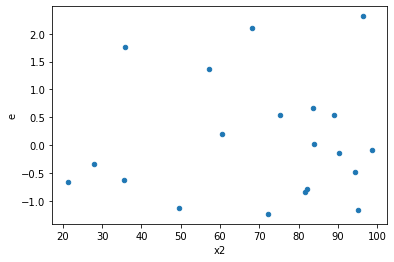

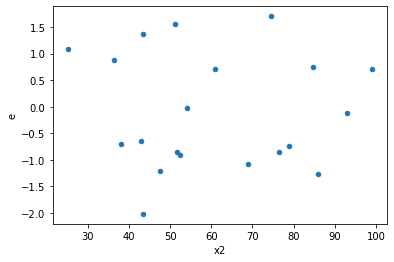

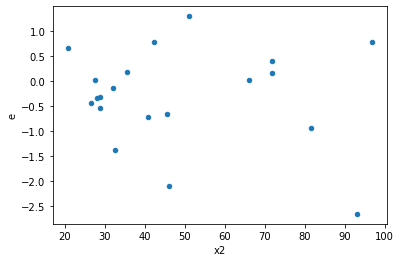

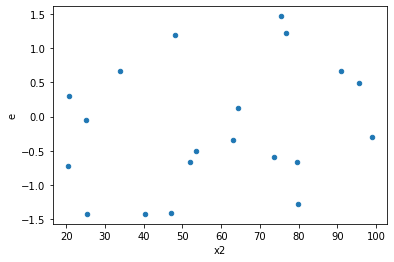

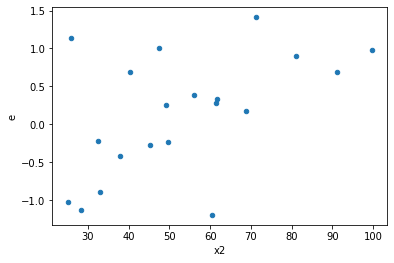

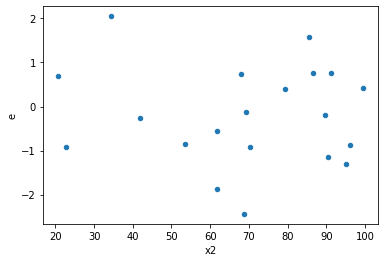

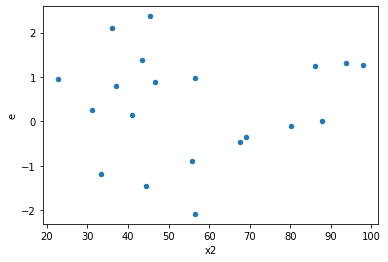

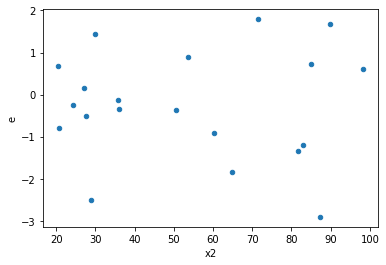

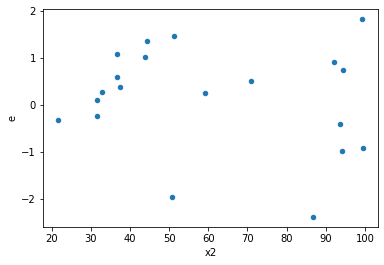

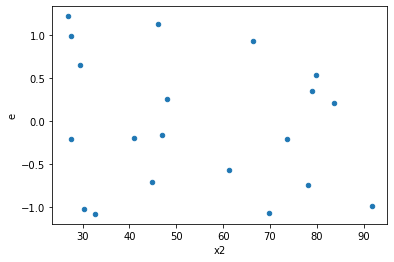

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,5.0,2.481425190488109,1.9698182121408365,0.27571391005423435,0.3939636424281673,1.428885624053834,0.7251974856178993,0.6374012571910503,0.36259874280894966,Reject005=1 : Homoscedasticity
1.0,4.0,10.0,0.6159799962778245,12.153584580538555,0.15399499906945613,1.2153584580538555,7.89219432707483,0.007729995263382916,0.9961350023683085,0.003864997631691458,Reject005=0 : Heteroscedasticity
4.0,9.0,5.0,8.276861477883832,6.812728128959607,0.9196512753204258,1.3625456257919215,1.481589448475654,0.6936109518488025,0.6531945240755987,0.34680547592440125,Reject005=1 : Homoscedasticity
9.0,5.0,9.0,2.5244969014395924,8.55462079026168,0.5048993802879185,0.9505134211401867,1.8825798926474362,0.38605128416152956,0.8069743579192352,0.19302564208076478,Reject005=1 : Homoscedasticity
10.0,7.0,7.0,6.112034105748422,11.873128892565544,0.8731477293926317,1.6961612703665063,1.9425822381126376,0.4006932196506585,0.7996533901746707,0.20034660982532926,Reject005=1 : Homoscedasticity
11.0,7.0,7.0,5.359625028581304,12.795805272674171,0.7656607183687577,1.8279721818105958,2.387444122385037,0.27362291281028384,0.8631885435948581,0.13681145640514192,Reject005=1 : Homoscedasticity
12.0,11.0,3.0,8.58268270298757,3.9299974154337836,0.7802438820897791,1.309999138477928,1.67896111529804,0.7382417606594844,0.6308791196702578,0.3691208803297422,Reject005=1 : Homoscedasticity
19.0,8.0,6.0,2.2538463499804733,6.038189027057365,0.28173079374755916,1.0063648378428942,3.57207965965067,0.13818679504736364,0.9309066024763182,0.06909339752368182,Reject005=1 : Homoscedasticity
23.0,8.0,6.0,4.422314873847584,4.173694894331528,0.552789359230948,0.6956158157219213,1.258374105987996,0.8014680219555412,0.5992659890222294,0.4007340109777706,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,2.481425190488109,1.9698182121408365,0.27571391005423435,0.3939636424281673,1.428885624053834,0.7251974856178993,Reject005=1 : Homoscedasticity
1.0,4.0,10.0,0.6159799962778245,12.153584580538555,0.15399499906945613,1.2153584580538555,7.89219432707483,0.007729995263382916,Reject005=0 : Heteroscedasticity
2.0,8.0,6.0,11.136450416481608,7.414981297059369,1.392056302060201,1.2358302161765615,0.8877731556888686,0.8510741016644701,Reject005=1 : Homoscedasticity
3.0,9.0,5.0,8.066934991173083,1.7581357949335987,0.8963261101303426,0.35162715898671976,0.3922982439232821,0.21081844909199873,Reject005=1 : Homoscedasticity
4.0,9.0,5.0,8.276861477883832,6.812728128959607,0.9196512753204258,1.3625456257919215,1.481589448475654,0.6936109518488025,Reject005=1 : Homoscedasticity
5.0,4.0,10.0,2.779767360787683,2.4281088036043945,0.6949418401969207,0.24281088036043946,0.3493974118634674,0.32263245848935,Reject005=1 : Homoscedasticity
6.0,6.0,8.0,8.215127679699595,8.560048170047388,1.3691879466165993,1.0700060212559235,0.7814895127436783,0.7854048123777196,Reject005=1 : Homoscedasticity
7.0,6.0,8.0,4.171399519723301,3.1471516197083993,0.6952332532872169,0.3933939524635499,0.565844557353228,0.5037745589550258,Reject005=1 : Homoscedasticity
8.0,6.0,8.0,7.003511983259408,5.324713666647018,1.1672519972099014,0.6655892083308772,0.5702189500826251,0.5097330887984536,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      880
Reject005=0 : Heteroscedasticity    120
Name: Result_test, dtype: int64